In [14]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from datetime import datetime, timedelta
%matplotlib inline

In [15]:
#Função para gerar dados ficticios
def gerar_dados(num_registros = 600):
    print(f'\nIniciando a geração de {num_registros} de vendas...')

    produtos = {
        'Mouse Vertical': {'categoria': 'Eletrônicos', 'preco': 7500.00 },
        'Laptop Gamer': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco':  550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00},
        'HD': {'categoria': 'Hardware', 'preco': 300.00},
        'Mouse comum': {'categoria': 'Acessórios', 'preco': 200.00}
    }

    cidade_estados = {
        'Sao Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    lista_produtos = list(produtos.keys())
    lista_cidades = list(cidade_estados.keys())

    

    data_inicial = datetime(2026, 1, 1)

    dados_vendas = []
    for i in range(num_registros):
        nome_produto = random.choice(lista_produtos)
        cidade = random.choice(lista_cidades)
        quantidade = np.random.randint(1, 8)
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        if nome_produto in ('Mouse', 'Teclado'):
            preco_unitario = produtos[nome_produto]['preco']*np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[nome_produto]['preco']

        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': nome_produto,
            'Categoria': produtos[nome_produto]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidade_estados[cidade]

        })
    
    print('Geração de dados concluída.\n')
    return pd.DataFrame(dados_vendas)

In [16]:
df_vendas = gerar_dados(1500)


Iniciando a geração de 1500 de vendas...
Geração de dados concluída.



In [17]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 07:00:00,HD,Hardware,300.0,4,111,Rio de Janeiro,RJ
1,1001,2026-01-01 12:00:00,Monitor Ultrawide,Eletrônicos,2800.0,1,101,Sao Paulo,SP
2,1002,2026-01-01 22:00:00,HD,Hardware,300.0,1,127,Curitiba,PR
3,1003,2026-01-01 14:00:00,Mouse comum,Acessórios,200.0,3,137,Fortaleza,CE
4,1004,2026-01-01 01:00:00,Placa de Vídeo,Hardware,4500.0,7,142,Salvador,BA


In [18]:

df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])
df_vendas['Faturamento'] = df_vendas['Preco_Unitario']*df_vendas['Quantidade']
df_vendas['Status de Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ('SP', 'RJ', 'MG') else 'Normal')



In [19]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status de Entrega
0,1000,2026-01-01 07:00:00,HD,Hardware,300.0,4,111,Rio de Janeiro,RJ,1200.0,Rápida
1,1001,2026-01-01 12:00:00,Monitor Ultrawide,Eletrônicos,2800.0,1,101,Sao Paulo,SP,2800.0,Rápida
2,1002,2026-01-01 22:00:00,HD,Hardware,300.0,1,127,Curitiba,PR,300.0,Normal
3,1003,2026-01-01 14:00:00,Mouse comum,Acessórios,200.0,3,137,Fortaleza,CE,600.0,Normal
4,1004,2026-01-01 01:00:00,Placa de Vídeo,Hardware,4500.0,7,142,Salvador,BA,31500.0,Normal


In [20]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Pedido          1500 non-null   int64         
 1   Data_Pedido        1500 non-null   datetime64[ns]
 2   Nome_Produto       1500 non-null   object        
 3   Categoria          1500 non-null   object        
 4   Preco_Unitario     1500 non-null   float64       
 5   Quantidade         1500 non-null   int64         
 6   ID_Cliente         1500 non-null   int64         
 7   Cidade             1500 non-null   object        
 8   Estado             1500 non-null   object        
 9   Faturamento        1500 non-null   float64       
 10  Status de Entrega  1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 129.0+ KB


In [ ]:
top_10prod = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

top_10prod

Nome_Produto
Mouse Vertical       663
Cadeira Gamer        651
Placa de Vídeo       644
Mouse comum          621
HD                   617
Headset 7.1          594
SSD 1TB              587
Monitor Ultrawide    569
Laptop Gamer         523
Teclado Mecânico     511
Name: Quantidade, dtype: int64

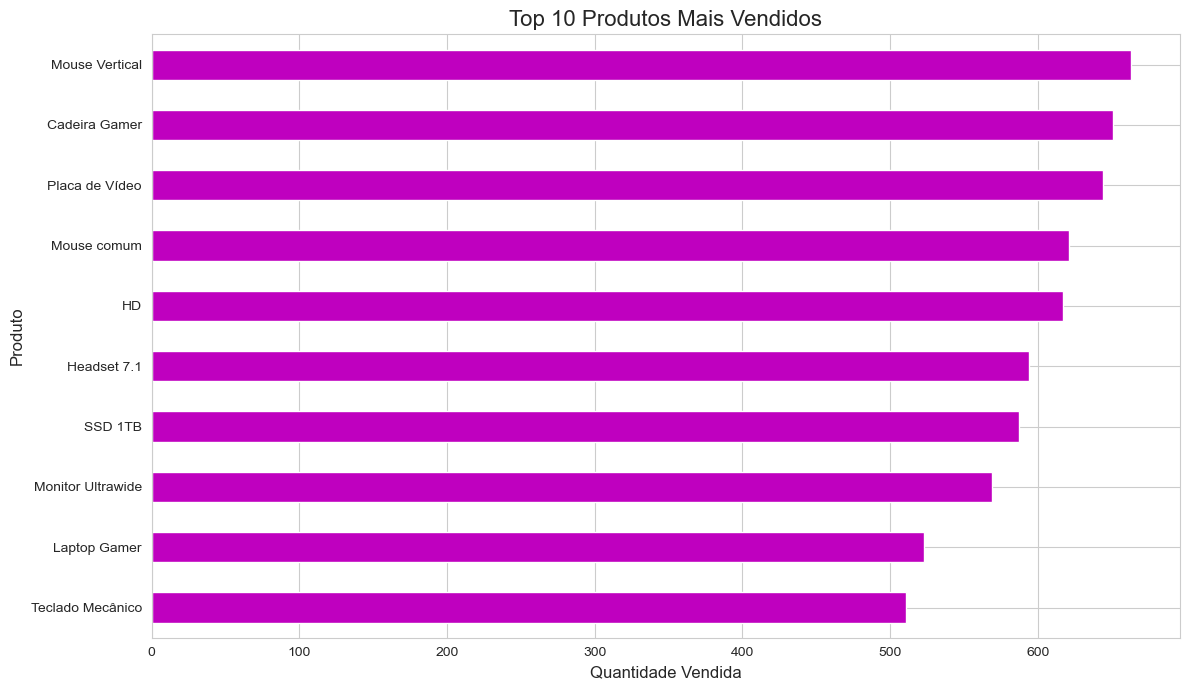

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 7))

top_10prod.sort_values(ascending = True).plot(kind = 'barh', color = 'm')

plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)
plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)

plt.tight_layout()
plt.show()